<img src='../../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# WMO SDS-WAS Barcelona Dust Forecast - MONARCH

### About

This notebook provides an introduction to dust forecast data from the NMMB/MONARCH model. The notebook introduces you to the variable `Dust Optical Depth` and you will learn how the model has predicted the **Saharan Dust event** which occured over Europe in the first half of February 2021.

The [WMO Sand and Dust Storm Warning Advisory and Assessment System (SDS-WAS)](https://community.wmo.int/activity-areas/gaw-sand-and-dust-storm-warning-advisory-and-assessment-system-sds-was) is an international framework linking institutions involved in [Sand and Dust Storm (SDS)](https://public.wmo.int/en/our-mandate/focus-areas/environment/SDS) research, operations and delivery of services. The SDS-WAS has the following objectives:
* Provide user communities access to forecasts, observations and information of the SDS through regional centres connected to the WMO Information System (WIS) and the World Wide Web
* Identify and improve SDS products through consultation with the operational and user communities
* Enhance operational SDS forecasts through technology transfer from research
* Improve forecasting and observation technology through coordinated international research and assessment
* Build capacity of relevant countries to utilize SDS observations, forecasts and analysis products for meeting societal needs
* Build bridges between SDS-WAS and other communities conducting aerosol related studies (air quality, biomass burning, etc.)
 
The framework is organised in several regional centers, which aim to implement SDS-WAS objectives in a specific region. The Barcelona Supercomputing Center (BSC-CNS) and the Meteorological State Agency of Spain (AEMET) are hosting the [SDS-WAS regional center for Northern Africa, Middle East and Europe](https://dust.aemet.es/).

One of the main activities of the SDS-WAS regional center is to provide daily operational dust forecasts for Northern Africa (north of the equator), Middle East and Europe. The BCS-CNS, in collaboration with NOAA's National Centers for Environmental Prediction (NCEP), the NASA's Goddard Institute for Space Studies and the International Research Institute for Climate Society (IRI), has developed [NMMB/MONARCH](https://dust.aemet.es/methods/the-nmmb-bsc-dust-model), an online multi-scale atmospheric dust model intended to provide short and medium-range dust forecasts for both, regional and global domains. 

The model provides forecast information up to 72 hours in advance (every 3 hours) of two parameters: `Dust Optical Depth` and `Dust Surface Concentration`.

MONARCH Forecast data are available in `netCDF` format and are available for download [here](https://dust.aemet.es/products/data-download).

### Basic Facts

> **Spatial resolution**: `0.1° x 0.1°` <br>
> **Spatial coverage**: `Northern Africa, Middle East and Europe` <br>
> **Temporal resolution**:  `3-hourly up to 72 hours in advance` <br>
> **Temporal coverage**: `since February 2012` <br>
> **Data format**: `NetCDF`


### How to access the data

Dust forecast data from the NMMB/MONARCH model are available for download via the website of the [SDS-WAS Regional Center for Northern Africa, Middle East and Europe](https://dust.aemet.es).

To download numerical data, use the [THREDDS system](https://dust.aemet.es/products/data-download). You will have access to the "public" repository which has a lag of 2 days in the forecasts files. Every participant of the training school and workshop on dust monitoring can use the following credentials for downloading data from the Public repository:

* User: `eumetsat-training`
* Password: `Sod/e3Oi2+cK17Z/`

For further information on the products and how to access you can check the [User Guide](https://dust.aemet.es/products/overview/user-guide/@@download).

Here is some example code (commented out) that you can use for downloading data programmatically using `wget`.

In [1]:
#import wget

In [1]:
#!wget --user="eumetsat-training" --password="Sod/e3Oi2+cK17Z/" "https://dust.aemet.es/thredds/fileServer/dataRoot/MONARCH/2020/12/20201231 12_3H_SDSWAS_NMMB-BSC-v2_OPER.nc"

### Module outline
* [1 - Load and browse NMMB/MONARCH dust forecast data](#load_file)
* [2 - Load the data variables as data arrays](#load_variables_sdswas)
* [3 - Visualize dust Aerosol Optical Depth](#visualize_bcs_dust)
* [4 - Animate dust AOD forecasts](#animate_bcs_dust)

<hr>

#### Load required libraries

In [3]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [4]:
%run ../functions.ipynb

<hr>

## <a id='load_file'>1. Load and browse NMMB/MONARCH dust forecast data

The first step is to load a `NMMB/MONARCH` forecast file to better understand its structure. The data is disseminated in the `netCDF` format on a daily basis, with the forecast initialisation at 12:00 UTC. Let us load the `NMMB/MONARCH` dust forecast of 5 February 2021. You can use the function `open_dataset()` from the xarray Python library, which makes reading a `netCDF` file very efficient and easy. The function loads the netCDF file as `xarray.Dataset()`, which is a data collection of multiple variables sharing the same coordinate information.

Below, you see that the `NMMB/MONARCH` data has three dimensions, `lat`, `lon` and `time`, and offers two data variables `od550_dust` and `sconc_dust`.

In [5]:
filepath = '../../../eodata/dust/part1/3_model/sds_was/2021020512_3H_NMMB-BSC.nc'

In [6]:
file = xr.open_dataset(filepath)
file

<xarray.Dataset>
Dimensions:     (lat: 825, lon: 1650, time: 25)
Coordinates:
  * lat         (lat) float32 -11.0 -10.9 -10.8 -10.7 ... 71.1 71.2 71.3 71.4
  * lon         (lon) float32 -63.0 -62.9 -62.8 -62.7 ... 101.7 101.8 101.9
  * time        (time) datetime64[ns] 2021-02-05T12:00:00 ... 2021-02-08T12:0...
Data variables:
    od550_dust  (time, lat, lon) float32 ...
    sconc_dust  (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.3 (http://...
    history:                    Sat Feb  6 00:15:10 2021: ncks -v sconc_dust,...
    Conventions:                CF-1.6
    comment:                    Generated on marenostrum4
    NCO:                        netCDF Operators version 4.9.5 (Homepage = ht...
    nco_openmp_thread_number:   1
    history_of_appended_files:  Fri Feb  5 23:32:43 2021: Appended file od550...
    cdo_openmp_thread_number:   4
    CDO:                        Climate Data Operators version 1.9.3 (http://...

Let us now have a closer look at the dimensions of the data. Let us first inspect the two coordinate dimensions `lat` and `lon`. You can simply access the dimension's `xarray.DataArray` by specifying the name of the dimension. Below you see that the data has a 0.1 x 0.1 degrees resolution and have the following geographical bounds:
* `Longitude: [-63., 101.9]`
* `Latitude: [-11., 71.4]`

In [7]:
latitude = file.lat
longitude = file.lon
latitude, longitude

(<xarray.DataArray 'lat' (lat: 825)>
 array([-11. , -10.9, -10.8, ...,  71.2,  71.3,  71.4], dtype=float32)
 Coordinates:
   * lat      (lat) float32 -11.0 -10.9 -10.8 -10.7 -10.6 ... 71.1 71.2 71.3 71.4
 Attributes:
     standard_name:  latitude
     long_name:      latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'lon' (lon: 1650)>
 array([-63. , -62.9, -62.8, ..., 101.7, 101.8, 101.9], dtype=float32)
 Coordinates:
   * lon      (lon) float32 -63.0 -62.9 -62.8 -62.7 ... 101.6 101.7 101.8 101.9
 Attributes:
     standard_name:  longitude
     long_name:      longitude
     units:          degrees_east
     axis:           X)

<br>

Now, let us also inspect the time dimension. You see that one daily forecast file has 25 time steps, with three hourly forecast information up to 72 hours (3 days) in advance.

In [8]:
file.time

<xarray.DataArray 'time' (time: 25)>
array(['2021-02-05T12:00:00.000000000', '2021-02-05T15:00:00.000000000',
       '2021-02-05T18:00:00.000000000', '2021-02-05T21:00:00.000000000',
       '2021-02-06T00:00:00.000000000', '2021-02-06T03:00:00.000000000',
       '2021-02-06T06:00:00.000000000', '2021-02-06T09:00:00.000000000',
       '2021-02-06T12:00:00.000000000', '2021-02-06T15:00:00.000000000',
       '2021-02-06T18:00:00.000000000', '2021-02-06T21:00:00.000000000',
       '2021-02-07T00:00:00.000000000', '2021-02-07T03:00:00.000000000',
       '2021-02-07T06:00:00.000000000', '2021-02-07T09:00:00.000000000',
       '2021-02-07T12:00:00.000000000', '2021-02-07T15:00:00.000000000',
       '2021-02-07T18:00:00.000000000', '2021-02-07T21:00:00.000000000',
       '2021-02-08T00:00:00.000000000', '2021-02-08T03:00:00.000000000',
       '2021-02-08T06:00:00.000000000', '2021-02-08T09:00:00.000000000',
       '2021-02-08T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-02-05T12:00:00 ... 2021-02-08T12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

## <a id='data_variables_sdswas'>2. Load data variables as data arrays

A `xarray.Dataset` is a collection of multiple variables and offers a general overview of the data, but does not offer direct access to the data arrays. For this reason, you want to load a data variable as `xarray.DataArray`. You can access the data array information by simply specifying the name of the variable after the name of the `xarray.Dataset`

Let us load both variables as `xarray.DataArray`, `od550_dust` and `sconc_dust`. Below you see that, once the data array is loaded, that each variable is disseminated with additional attributes, e.g. `long_name` and `units`. These attributes give us more information about the data. `od550_dust` e.g. is Aerosol Optical Depth which does not have a unit and `sconc_dust` is the surface dust concentration measured in kg / m<sup>3</sup>.

In [9]:
od_dust = file.od550_dust
od_dust

<xarray.DataArray 'od550_dust' (time: 25, lat: 825, lon: 1650)>
[34031250 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -11.0 -10.9 -10.8 -10.7 -10.6 ... 71.1 71.2 71.3 71.4
  * lon      (lon) float32 -63.0 -62.9 -62.8 -62.7 ... 101.6 101.7 101.8 101.9
  * time     (time) datetime64[ns] 2021-02-05T12:00:00 ... 2021-02-08T12:00:00
Attributes:
    long_name:  Aerosol optical depth
    units:      -

In [10]:
sconc_dust = file.sconc_dust
sconc_dust

<xarray.DataArray 'sconc_dust' (time: 25, lat: 825, lon: 1650)>
[34031250 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -11.0 -10.9 -10.8 -10.7 -10.6 ... 71.1 71.2 71.3 71.4
  * lon      (lon) float32 -63.0 -62.9 -62.8 -62.7 ... 101.6 101.7 101.8 101.9
  * time     (time) datetime64[ns] 2021-02-05T12:00:00 ... 2021-02-08T12:00:00
Attributes:
    long_name:  TRACERS_015
    units:      kgm-3

<br>

You can define variables for the attributes of a variable. This can be helpful during data visualization, as the attributes `long_name` and `units` can be added as additional information to the plot. From the `xarray.DataArray`, you simply specify the name of the attribute of interest.

In [11]:
long_name=od_dust.long_name
units= od_dust.units

<br>

## <a id='visualize_bcs_dust'></a>3. Visualize dust Aerosol Optical Depth at 550 nm

Now we have loaded all necessary information to be able to visualize the dust Aerosol Optical Depth for one specific time during the forecast run. Let us use the function `visualize_pcolormesh()` to visualize the data with the help of the plotting library [matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

You have to specify the following keyword arguments:
* `data_array`: the
* `longitude`, `latitude`: longitude and latitude variables of the data variable
* `projection`: one of [Cartopy's projection options](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
* `color_scale`: one of [matplotlib's colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* `units`: unit of the data parameter, preferably taken from the data array's attributes
* `long_name`: longname of the data parameter is taken as title of the plot, preferably taken from the data array's attributes
* `vmin`, `vmax`: minimum and maximum bounds of the color range
* `set_global`: False, if data is not global
* `lonmin`, `lonmax`, `latmin`, `latmax`: kwargs have to be specified, if `set_global=False`



Note: in order to have the time information as part of the title, we add the string of the datetime information to the `long_name` variable: `long_name + ' ' + str(od_dust[##,:,:].time.data)[0:19]`.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol optical depth 2021-02-06T06:00:00'}>)

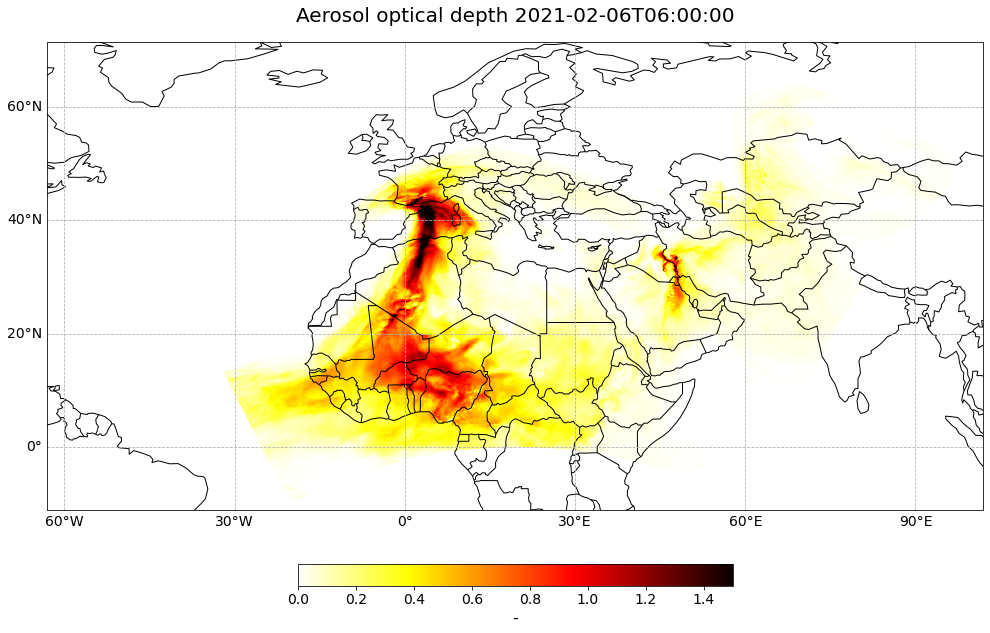

In [12]:
forecast_step = 6
visualize_pcolormesh(data_array=od_dust[forecast_step,:,:],
                     longitude=od_dust.lon,
                     latitude=od_dust.lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=long_name + ' ' + str(od_dust[forecast_step,:,:].time.data)[0:19],
                     vmin=0, 
                     vmax=1.5,
                     set_global=False,
                     lonmin=longitude.min().data,
                     lonmax=longitude.max().data,
                     latmin=latitude.min().data,
                     latmax=latitude.max().data)

<br>

### <a id='animate_bcs_dust'></a>4. Animate dust Aerosol Optical Depth forecasts

In the last step, you can animate the `Dust Aerosol Optical Depth` forecasts in order to see how the trace gas develops over a period of 3 days, from 5th Feb 12 UTC to 8th February 2021.

You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [13]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=od_dust[0,:,:],
                     longitude=od_dust.lon,
                     latitude=od_dust.lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=long_name + ' ' + str(od_dust[0,:,:].time.data)[0:19],
                     vmin=0, 
                     vmax=1.5,
                     lonmin=longitude.min().data,
                     lonmax=longitude.max().data,
                     latmin=latitude.min().data,
                     latmax=latitude.max().data,
                     set_global=False)

frames = 24

def draw(i):
    img = plt.pcolormesh(od_dust.lon, 
                         od_dust.lat, 
                         od_dust[i,:,:], 
                         cmap='hot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=1.5,
                         shading='auto')
    
    ax.set_title(long_name + ' '+ str(od_dust.time[i].data)[0:19], fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

In [14]:
HTML(ani.to_html5_video())

<hr>

### References

* Data and/or images from the WMO SDS-WAS NA-ME-E Regional Center (http://sds-was.aemet.es)
* Data, images and other products from the SDS-WAS available on this server may be used solely for research and education purposes

<hr>

<img src='../../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>